In [13]:
%pip install xgboost

  Using cached xgboost-3.0.5-py3-none-manylinux_2_28_x86_64.whl.metadata (2.1 kB)
  Using cached nvidia_nccl_cu12-2.28.3-py3-none-manylinux_2_18_x86_64.whl.metadata (2.0 kB)
Using cached xgboost-3.0.5-py3-none-manylinux_2_28_x86_64.whl (94.9 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.9/295.9 MB 2.5 MB/s eta 0:00:0000:0100:03m
Note: you may need to restart the kernel to use updated packages.


In [14]:
import numpy as np
from sklearn.ensemble import * 
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import xgboost as xgb


In [15]:
X,y = make_classification(n_samples=1000,n_features=4,n_informative=2,n_redundant=0,random_state=0,shuffle=False)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [ ]:
clf = xgb.XGBClassifier(
    n_estimators=100,       # Number of trees
    max_depth=3,            # Maximum tree depth
    learning_rate=0.1,      # Step size shrinkage
    objective='binary:logistic',  # For binary classification
    eval_metric='logloss',  # Evaluation metric
    use_label_encoder=False
)



In [20]:
clf.fit(X_train,y_train)

/home/srikar/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:06] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [21]:
y_pred = clf.predict(X_test)


In [22]:
from sklearn.metrics import precision_score, recall_score, f1_score

# For binary classification
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Precision: 0.9285714285714286
Recall: 0.9512195121951219
F1 Score: 0.9397590361445783


ROC AUC Area: 0.9775933000293859


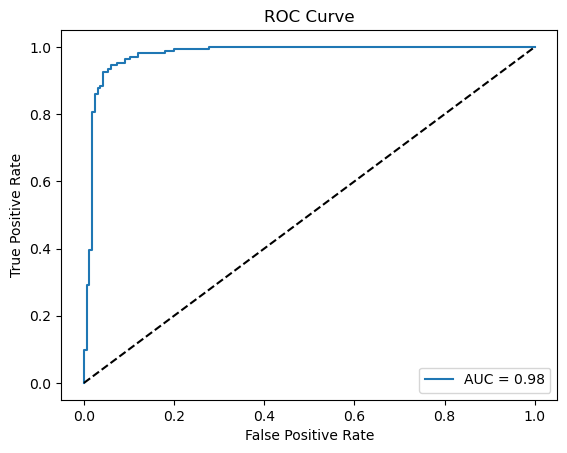

In [23]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class
y_probs = clf.predict_proba(X_test)[:, 1]  

# AUC Score
auc = roc_auc_score(y_test, y_probs)
print("ROC AUC Area:", auc)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0,1], [0,1], 'k--')  # diagonal line (random guess)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()
